In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS

In [2]:
data = pd.read_csv('cleaned-winemag-data-130k-v2.csv', index_col = 0)
data.head(5)

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,25.0,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Unknown,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",Unknown,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


<AxesSubplot:title={'center':'wine counts according to province'}, xlabel='province', ylabel='wine counts'>

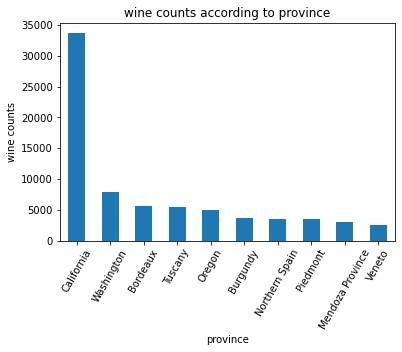

In [3]:
# summary statistics.
# use bar charts to visualize categorical data(column province, price)
data['province'].value_counts().head(10).plot.bar(xlabel = "province", ylabel = "wine counts", rot = 60, title = "wine counts according to province")

<AxesSubplot:title={'center':'wine counts according to province'}, xlabel='province', ylabel='proportion of total wine counts'>

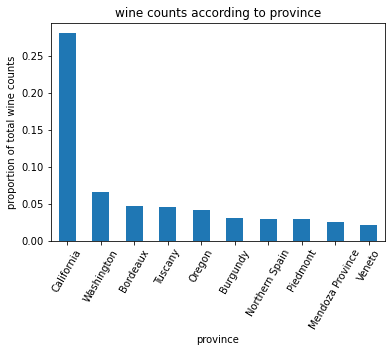

In [4]:
# use relative proportions.
(data['province'].value_counts().head(10) / len(data)).plot.bar(xlabel = "province", ylabel = "proportion of total wine counts", rot = 60, title = "wine counts according to province")

<AxesSubplot:title={'center':'wine counts according to country'}, xlabel='country', ylabel='proportion of total wine counts'>

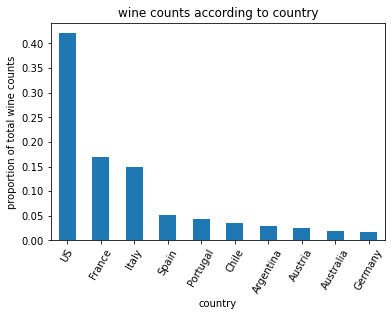

In [5]:
# same as column country.
(data['country'].value_counts().head(10) / len(data)).plot.bar(xlabel = "country", ylabel = "proportion of total wine counts", rot = 60, title = "wine counts according to country")

<AxesSubplot:title={'center':'wine points'}, xlabel='points', ylabel='wine counts'>

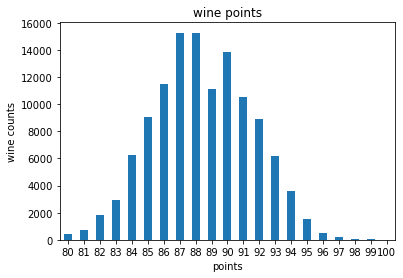

In [6]:
# same as column points.
data['points'].value_counts().sort_index().plot.bar(xlabel = "points", ylabel = "wine counts", rot = 360, title = "wine points")

In [7]:
# plot wine points into six categories.
def category_points(points):
    if points in list(range(80,83)):
        return 1
    elif points in list(range(83,87)):
        return 2
    elif points in list(range(87,90)):
        return 3
    elif points in list(range(90,94)):
        return 4
    elif points in list(range(94,98)):
        return 5
    elif points in list(range(98,100)):
        return 6
data['rating_category'] = data['points'].apply(category_points)

Text(0, 0.5, 'wine counts')

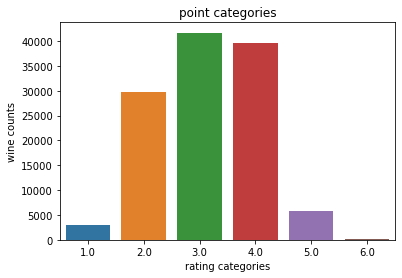

In [8]:
fig = sns.countplot(x = 'rating_category', data = data)
fig.set_title('point categories')
fig.set_xlabel('rating categories')
fig.set_ylabel('wine counts')

<AxesSubplot:title={'center':'wine counts according to variety'}, xlabel='variety(type of used grape)', ylabel='proportion of total wine counts'>

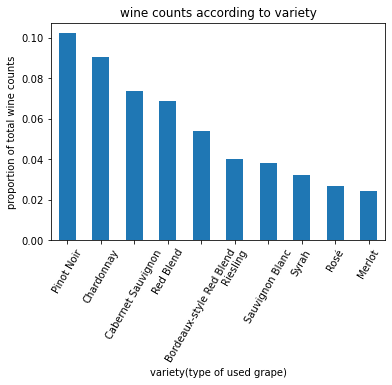

In [9]:
# same as column variety.
(data['variety'].value_counts().head(10)/ len(data)).plot.bar(xlabel = "variety(type of used grape)", ylabel = "proportion of total wine counts", rot = 60, title = "wine counts according to variety")

<AxesSubplot:title={'center':'wine counts according to winery'}, xlabel='winery', ylabel='wine counts'>

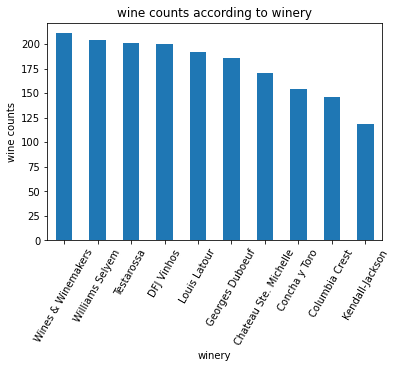

In [10]:
# same as column winery.
data['winery'].value_counts().head(10).plot.bar(xlabel = "winery", ylabel = "wine counts", rot = 60, title = "wine counts according to winery")

<AxesSubplot:title={'center':'wine price'}, ylabel='Frequency'>

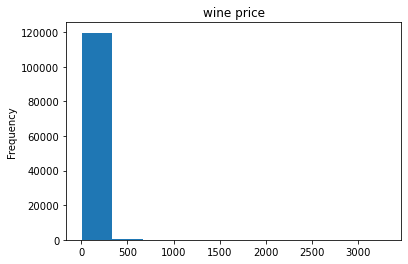

In [11]:
# use histogram to visualize column price.
data['price'].plot.hist(xlabel = "price", ylabel = "wine counts", title = "wine price")

<AxesSubplot:title={'center':'wine price'}, ylabel='Frequency'>

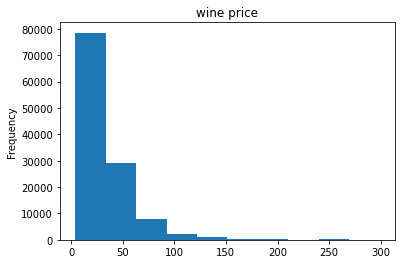

In [12]:
(data[data['price'] < 300]['price']).plot.hist(xlabel = "points", ylabel = "wine counts", title = "wine price")

D:\Program Files (x86)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

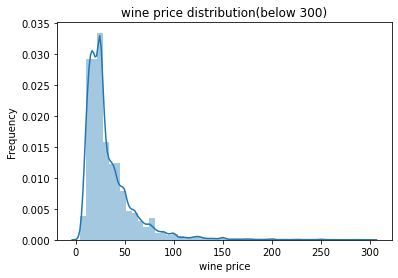

In [13]:
# since histogram of price is skewed by outliers(price>300), thus exclude price over 300.
fig = sns.distplot(data[data['price'] < 300]['price'])
fig.set_title('wine price distribution(below 300)')
fig.set_xlabel("wine price")
fig.set_ylabel('Frequency')

<AxesSubplot:xlabel='price', ylabel='points'>

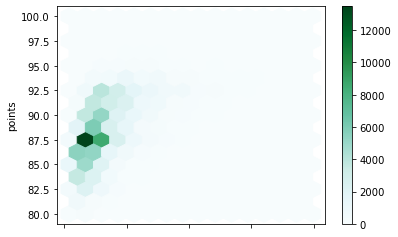

In [14]:
# bivariate plotting.
# use hex plot to see the relationship between price and points.
data[data['price'] < 200].plot.hexbin(x='price', y='points', gridsize = 15)

In [15]:
# see the relationship between variety and points.
# filter data to only include top 5 varieties, calculate wine counts of top 5 varieties.
top5_variety_data = data[data.variety.isin(data.variety.value_counts().head(5).index)]
wine_counts = top5_variety_data.groupby(['points','variety']).country.count().unstack()

<AxesSubplot:title={'center':'wine counts and points according to top 5 varieties'}, xlabel='points', ylabel='wine counts'>

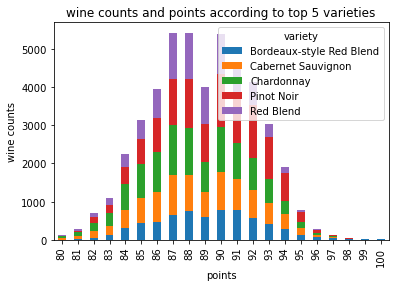

In [16]:
wine_counts.plot.bar(xlabel = 'points', ylabel = 'wine counts', title = 'wine counts and points according to top 5 varieties', stacked=True)

Text(0, 0.5, 'wine price(log)')

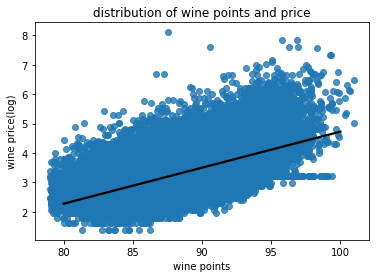

In [17]:
# see the relationship between price and points.
data['price_log'] = np.log(data['price'])
fig = sns.regplot(x = 'points', y = 'price_log', data = data, line_kws={'color':'black'}, x_jitter=True, fit_reg=True)
fig.set_title("distribution of wine points and price")
fig.set_xlabel("wine points")
fig.set_ylabel("wine price(log)")

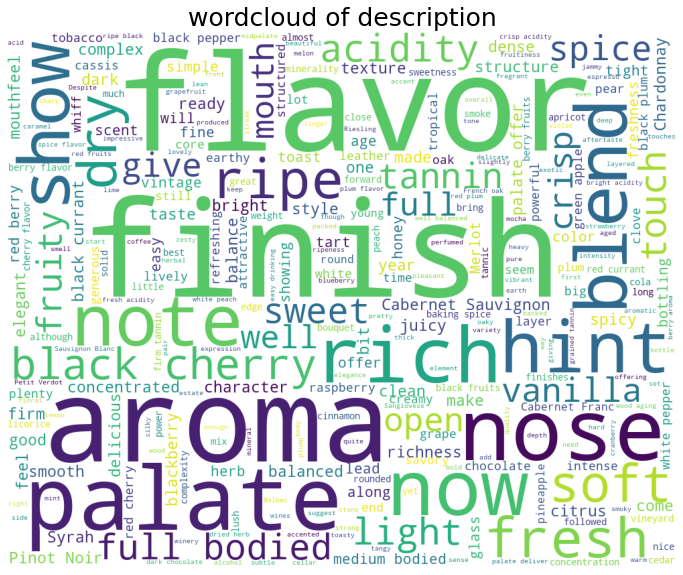

In [18]:
# word frequency analysis on column description and title.
stopwords = set(STOPWORDS)
newStopWords = ['fruit', "Drink", 'wine', 'drink']
stopwords.update(newStopWords)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, max_words = 300, max_font_size=200, width=1000, height=800, random_state=42,).generate(" ".join(data['description'].astype(str)))
plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title('wordcloud of description', fontsize = 25)
plt.axis('off')
plt.show()

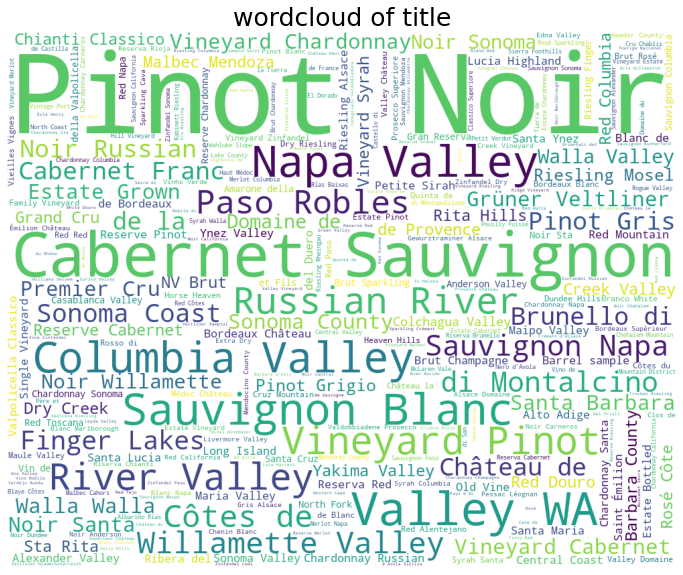

In [19]:
# same on column title.
wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, max_words = 300, max_font_size=200, width=1000, height=800, random_state=42,).generate(" ".join(data['title'].astype(str)))
plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title('wordcloud of title', fontsize = 25)
plt.axis('off')
plt.show()